In [3]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Read CSV file
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

# manipulate data
df['dag'] = df['procesdag'].dt.day
new_df = df.groupby([df['cust_id'], df['dag']]).agg(
    totaal_aantal_pakketten = ('aantal_pakketten', 'sum'),
    totaal_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag','sum')).reset_index()

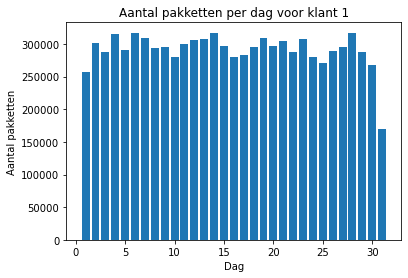

In [4]:
# Define X and Y, 1st plot (klant 1)
df_klant1 = new_df.where(new_df['cust_id'] == 'klant_1').dropna()
fig, ax = plt.subplots()
ax.bar(df_klant1['dag'], df_klant1['totaal_aantal_pakketten'])
ax.set(
    xlabel = 'Dag',
    ylabel = 'Aantal pakketten',
    title = 'Aantal pakketten per dag voor klant 1')
plt.show()